<a href="https://colab.research.google.com/github/1830668NabilahOshin/Numerical-methods-and-Neural-Network-Labwork/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Tree of Decisions and Outcomes

#*What is a Decision Tree?*

Imagine The possible solutions to a given problem emerge as the leaves of a tree, each node representing a point of deliberation and decision.

Decision Tree is a algorithm that is preferred for solving Classification and regression related problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome. Thus It gives a graphical representation for getting all the possible solutions to a problem/decision based on given conditions. It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.


#What does a Decision tree contains ?

Similar to the popular binary tree structure, In a Decision tree, there are two types of nodes, which are the Decision Node and Leaf Node. The decision nodes creating subtrees are also known as internal nodes. Decision nodes are used to make any decision and have multiple branches, whereas Leaf nodes are the output of those decisions and do not contain any further branches. A decision tree simply asks a question, and based on the answer (Yes/No), it further split the tree into subtrees.

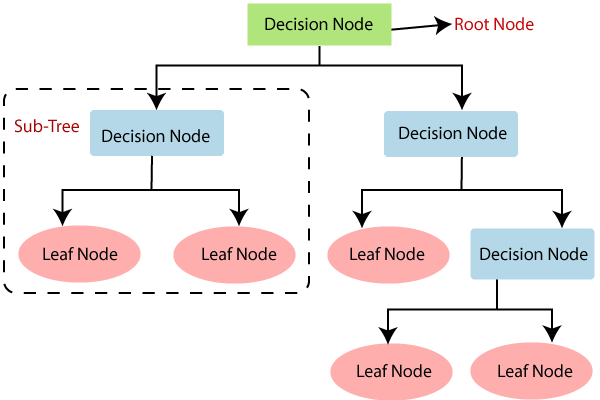

#What do we get from a decision Tree ?

A decision tree makes it easier for us to draw conclusions in a structured way. Each decision nodes gives an outcome for a condition satisfied and another outcome for unsatisfied. Thus we can figure out the final outcome from all the satisfied conditio. Let's look at how a company hires new employees. From the decision tree below, we can draw these conclusions :     

- If the age of the candidate is ABOVE 26 and HAS 4 YEARS OF EXPERIENCE, is HIRED

- If the age of the candidate is BELOW 26, is GRADUATED and HIGHLY SKILLED, the candidate is HIRED

For all the other cases, the candidate is REJECTED. Such as-

- If the age of the candidate is ABOVE 26 and does NOT HAVE ABOVE 4 YEARS OF EXPERIENCE, is REJECTED

-If the age of the candidate is BELOW 26 and is NOT GRADUATED, is REJECTED

-If the age of the candidate is BELOW 26, is GRADUATED and NOT HIGHLY SKILLED, the candidate is REJECTED

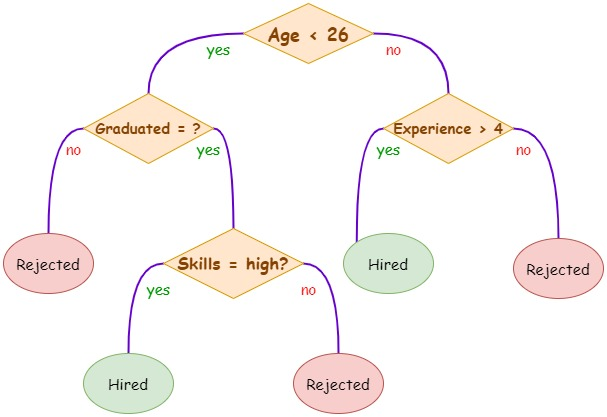

#Let's look at another Simple decision tree with numerical values to visualise well

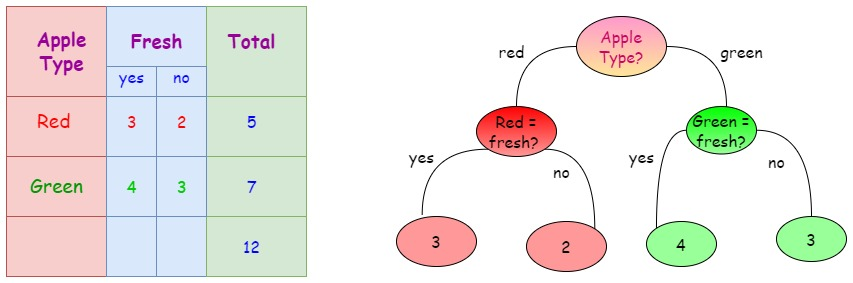

#Entrophy

Entropy is a metric to measure the impurity in a given attribute. It specifies randomness in data. The higher the entropy, the harder it is to draw any conclusions from that information. The atttribute which has the highest entrophy can be considered for making top level decision first. A branch of the decision tree with an entropy of zero is a leaf node and A branch with entropy more than zero needs further splitting.


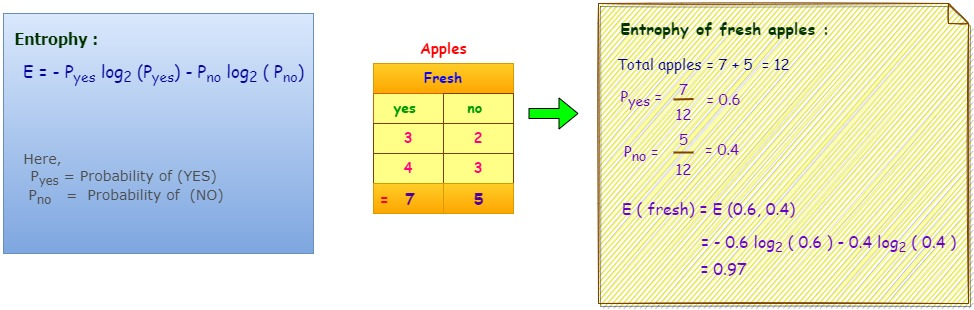

#Entrophy of multiple attributes



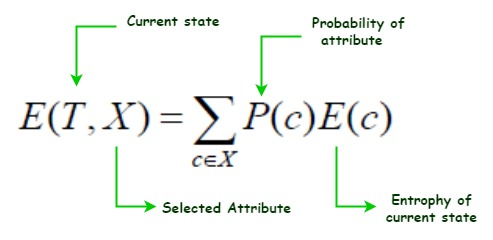

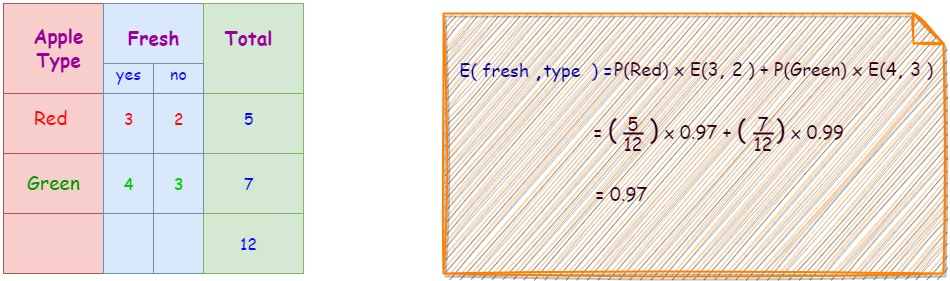

#Information Gain by Entrophy

Information gain is the measurement of changes in entropy after the segmentation of a dataset based on an attribute. Information Gain is applied to comprehend which feature provides maximal information about the classification based on the notion of entropy.

As it calculates how much information a feature provides us about a class,
we split the node having the highest information gain first and build the decision tree according to the value of information gain after every split. It can be calculated using the below formula:

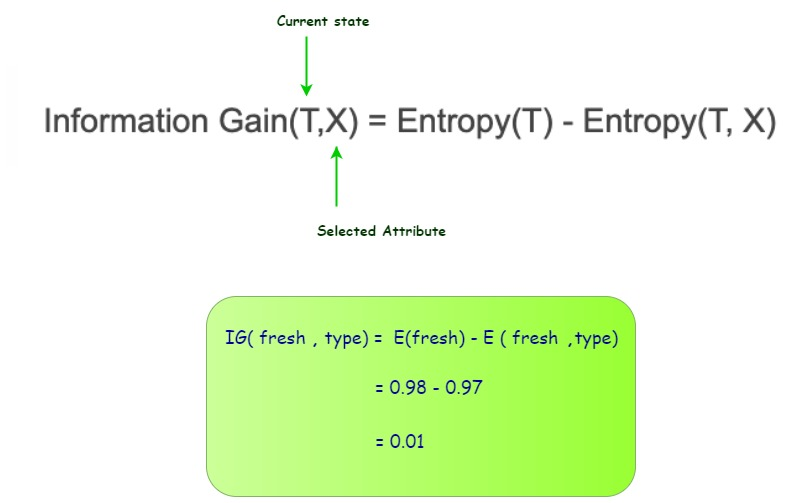

#Gini Impurity

Gini Impurity or index calculates the amount of probability of a specific attribute that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

 The Gini index varies between values 0 and 1. If All the elements belong to a specified class or only one class exists there, the gini index value will be 0 expressing the purity of classification. If all of the elements have a random distribution across various classes, the gini index will be 1. The value 0.5 of the Gini Index shows an equal distribution of elements over classes.

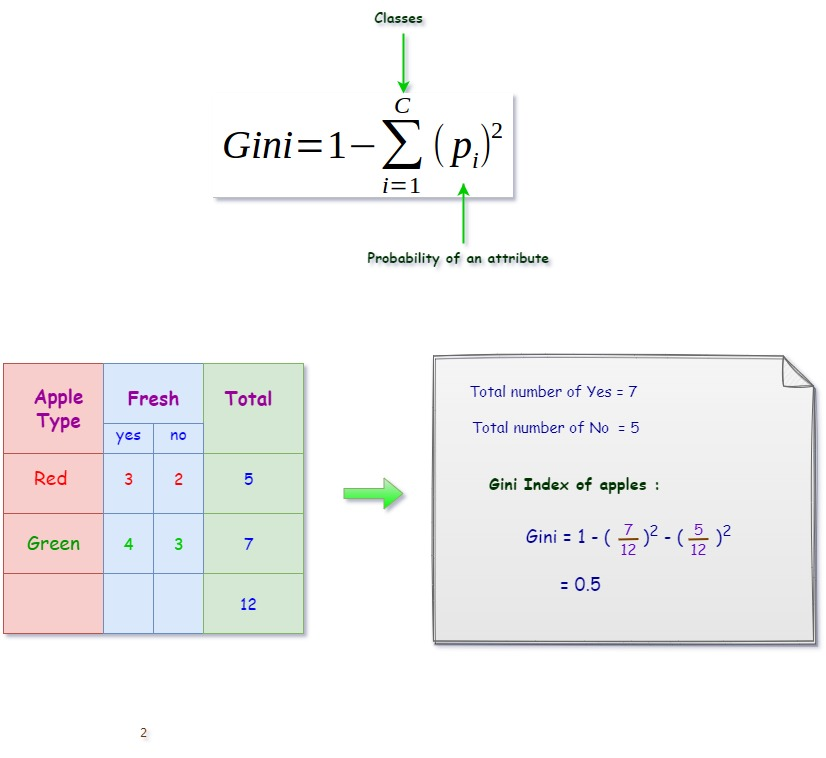

#Decision Tree Implementation by Python

In [ ]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

#Decision tree implementation on a Dataset

#Reading dataset

In [ ]:
import pandas as pd

df = pd.read_csv('amazon-review.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (607, 6)


In [ ]:
df.head(10)

,reviewText,summary,verified,time,log_votes,isPositive
0,"PURCHASED FOR YOUNGSTER WHO\nINHERITED MY ""TOO...",IDEAL FOR BEGINNER!,True,1361836800,0.000000,1
1,unable to open or use,Two Stars,True,1452643200,0.000000,0
2,Waste of money!!! It wouldn't load to my system.,Dont buy it!,True,1433289600,0.000000,0
3,I attempted to install this OS on two differen...,I attempted to install this OS on two differen...,True,1518912000,0.000000,0
4,I've spent 14 fruitless hours over the past tw...,Do NOT Download.,True,1441929600,1.098612,0
5,I purchased the home and business because I wa...,Quicken home and business not for amatures,True,1335312000,0.000000,0
6,The download doesn't take long at all. And it'...,Great!,True,1377993600,0.000000,1
7,This program is positively wonderful for word ...,Terrific for practice.,False,1158364800,2.397895,1
8,Fantastic protection!! Great customer support!!,Five Stars,True,1478476800,0.000000,1
9,Obviously Win 7 now the last great operating s...,Five Stars,True,1471478400,0.000000,1


#Counting the target column feature

In [ ]:
df["isPositive"].value_counts()

1    376
0    231
Name: isPositive, dtype: int64

#Checking for missing values

In [ ]:
print(df.isna().sum())

reviewText    0
summary       0
verified      0
time          0
log_votes     0
isPositive    0
dtype: int64


#Text preprocessing module

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize

# Let's get a list of stop words from the NLTK library
stop = stopwords.words('english')

# These words are important for our problem. We don't want to remove them.
excluding = ['against', 'not', 'don', "don't",'ain', 'aren', "aren't", 'couldn', "couldn't",
             'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't",
             'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't",
             'needn', "needn't",'shouldn', "shouldn't", 'wasn', "wasn't", 'weren',
             "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# New stop word list
stop_words = [word for word in stop if word not in excluding]

snow = SnowballStemmer('english')

def process_text(texts):
    final_text_list=[]
    for sent in texts:

        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ""

        filtered_sentence=[]

        sent = sent.lower() # Lowercase
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # R
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:

        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words

        final_text_list.append(final_string)

    return final_text_list

#Splitting dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df[["reviewText", "summary", "time", "log_votes"]],
                                                  df["isPositive"],
                                                  test_size=0.10,
                                                  shuffle=True,
                                                  random_state=324
                                                 )

#Preprocess the data

In [ ]:
print("Processing the reviewText fields")
X_train["reviewText"] = process_text(X_train["reviewText"].tolist())
X_val["reviewText"] = process_text(X_val["reviewText"].tolist())

print("Processing the summary fields")
X_train["summary"] = process_text(X_train["summary"].tolist())
X_val["summary"] = process_text(X_val["summary"].tolist())

Processing the reviewText fields
Processing the summary fields


In [ ]:
numerical_features = ['time',
                      'log_votes']

text_features = ['summary',
                 'reviewText']

model_features = numerical_features + text_features
model_target = 'isPositive'

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier



# Preprocess the numerical features
numerical_processor = Pipeline([
    ('num_scaler', MinMaxScaler()) # this can be skipped for trees
])

# Preprocess 1st text feature
text_processor_0 = Pipeline([
    ('text_vect_0', CountVectorizer(binary=True, max_features=50))
])

# Preprocess 2nd text feature (larger vocabulary)
text_precessor_1 = Pipeline([
    ('text_vect_1', CountVectorizer(binary=True, max_features=150))
])

data_preprocessor = ColumnTransformer([
    ('numerical_pre', numerical_processor, numerical_features),
    ('text_pre_0', text_processor_0, text_features[0]),
    ('text_pre_1', text_precessor_1, text_features[1])
])



# Pipeline desired all data transformers, along with an estimator at the end
# Later you can set/reach the parameters using the names issued - for hyperparameter tuning, for example
pipeline = Pipeline([
    ('data_preprocessing', data_preprocessor),
    ('decision_tree', DecisionTreeClassifier(max_depth = 10,
                                             min_samples_leaf = 15))
])

#Training

In [ ]:
# Fit the Pipeline to training data
pipeline.fit(X_train, y_train.values)

from sklearn import set_config
set_config(display='diagram')
pipeline

Pipeline(steps=[('data_preprocessing',
                 ColumnTransformer(transformers=[('numerical_pre',
                                                  Pipeline(steps=[('num_scaler',
                                                                   MinMaxScaler())]),
                                                  ['time', 'log_votes']),
                                                 ('text_pre_0',
                                                  Pipeline(steps=[('text_vect_0',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=50))]),
                                                  'summary'),
                                                 ('text_pre_1',
                                                  Pipeline(steps=[('text_vect_1',
                                                                   CountVectorizer(binary=True,
                                                                                   max_features=150))]),
                                                  'reviewText')])),
                ('decision_tree',
                 DecisionTreeClassifier(max_depth=10, min_samples_leaf=15))])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted pipeline to make predictions on the validation dataset
val_predictions = pipeline.predict(X_val)
print(confusion_matrix(y_val.values, val_predictions))
print(classification_report(y_val.values, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val.values, val_predictions))

[[20  3]
 [10 28]]
              precision    recall  f1-score   support

           0       0.67      0.87      0.75        23
           1       0.90      0.74      0.81        38

    accuracy                           0.79        61
   macro avg       0.78      0.80      0.78        61
weighted avg       0.81      0.79      0.79        61

Accuracy (validation): 0.7868852459016393


#Advantages of Decision Tree

- Decision tree provides an easy graphical interpretation of data.
- Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
- Normalization of data is not required.
- Scaling of data is not necessary.
- Missing values in the data do NOT affect the process of building a decision tree
- Less data is required to train



#Disadvantages of Decision Tree

- A small change in the data can cause a large change in the structure of the decision tree causing instability.
-For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
- Overfit issue
-Decision tree training is relatively expensive as the complexity and time has taken are more.
-The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.

In [ ]:
#Importing libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)

data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [ ]:
#Splitting dataset
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = data[feature_cols] # Features
y = data.label # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#Training
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))